In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import random
import time


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ASUS-PC\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ASUS-PC\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ASUS-PC\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

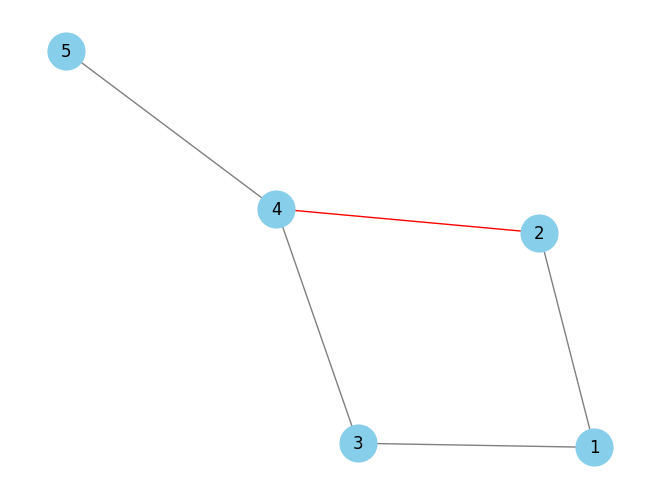

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Choose special edges
special_edges = [(2, 4)]

# Build color list
edge_colors = ['red' if edge in special_edges or (edge[1], edge[0]) in special_edges else 'gray' for edge in G.edges()]

# Draw graph
pos = nx.spring_layout(G)  # layout for consistent positions
nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color='skyblue', node_size=700)
plt.show()


In [ ]:
class graph:
    def __init__(self, n):
        self.n = n
        self.edges = []
        self.adj = [[] for _ in range(n+1)]  # nodes 1..n

    def add_edge(self, u, v, w=0):
        self.adj[u].append((v, w))
        self.edges.append((u, v, w))
    
    def bfs(self, s):
        l = [s]
        r = [s]
        vis = [0]*(self.n+1)
        vis[s] = 1
        while l:
            x = l.pop(0)
            for v, _ in self.adj[x]:
                if not vis[v]:
                    vis[v] = 1
                    l.append(v)
                    r.append(v)
        return r

In [ ]:
class DP_Hamiltionpath:
    def __init__(self, g, source, sink):
        self.g = g
        self.n = g.n 
        self.dp = [[-1]*(1 << (self.n+1)) for _ in range(self.n+1)]
        self.source = source
        self.sink = sink
    
    def DP_compute(self, i, mask):
        if mask == (1 << i) and i == self.sink:  # only sink node left
            return 1
        if i == self.sink:  # reached sink but other nodes remain
            return 0
        if self.dp[i][mask] != -1:
            return self.dp[i][mask]
        
        res = 0
        for v, _ in self.g.adj[i]:
            if mask & (1 << v):
                res = max(res, self.DP_compute(v, mask ^ (1 << i)))
        self.dp[i][mask] = res
        return res
    
    def _get(self):
        mask = (1 << (self.n+1))-1 
        mask^=(1<<self.source)
        return self.DP_compute(self.source, mask)
    def _get_path(self):
        mask = (1 << (self.n + 1)) - 2  # Initial mask with bits 1..n set
        if self.DP_compute(self.source, mask) == 0:
            return []  # No Hamiltonian path exists
        
        path = []
        current_node = self.source
        current_mask = mask
        
        while current_node != self.sink:
            path.append(current_node)
            found = False
            for v, _ in self.g.adj[current_node]:
                if (current_mask & (1 << v)) and self.dp[v][current_mask ^ (1 << current_node)] == 1:
                    current_mask ^= (1 << current_node)
                    current_node = v
                    found = True
                    break
            if not found:
                break  # Shouldn't happen if Hamiltonian path exists
        
        path.append(self.sink)
        return path
    


In [ ]:
g=graph(5)
g.add_edge(1,2)
g.add_edge(2,1)
g.add_edge(2,3)
g.add_edge(3,2)
g.add_edge(3,4)
g.add_edge(4,3)
g.add_edge(4,5)
g.add_edge(5,4)
g.add_edge(2,5)
g.add_edge(2,4)
g.add_edge(5,3)
g.add_edge(5,1)
dp_solver=DP_Hamiltionpath(g,2,1)
print(dp_solver._get())
print(dp_solver._get_path())


0
[2, 3, 4, 5, 1]


In [ ]:
G_nx = nx.Graph()

# Add all nodes
for u in range(1, g.n + 1):
    G_nx.add_node(u)

# Add all edges
for u, v, w in g.edges:
    G_nx.add_edge(u, v)
nodes=dp_solver._get_path()
path=[]
for i in range(len(nodes)-1):
    path.append((nodes[i],nodes[i+1]))
print(path)

[(2, 3), (3, 4), (4, 5), (5, 1)]


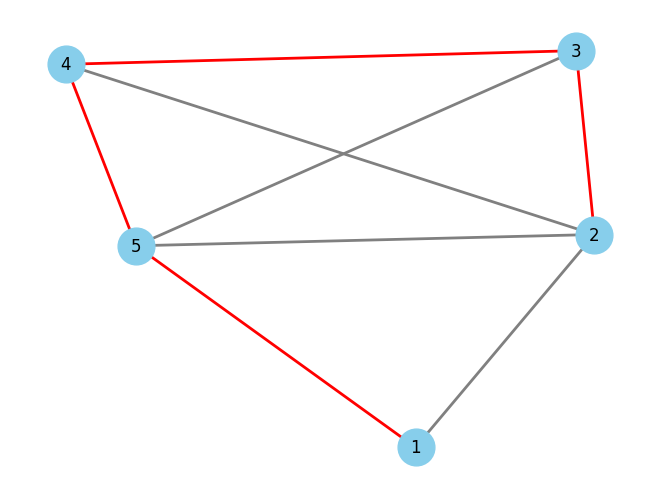

In [ ]:
# Prepare edge colors
edge_colors = []
for u, v in G_nx.edges():
    if (u, v) in path or (v, u) in path:
        edge_colors.append('red')  # Hamiltonian path edges in red
    else:
        edge_colors.append('gray')  # Other edges in gray

# Draw
pos = nx.spring_layout(G_nx)  # layout
nx.draw(G_nx, pos, with_labels=True, edge_color=edge_colors, node_color='skyblue', node_size=700, width=2)
plt.show()


In [ ]:
class LCT:
  def __init__(self, n):
    # Initialize the Link-Cut Tree with n nodes
    self.n = n
    self.ch = [[0, 0] for i in range(n + 1)]  # Children array
    self.fa = [0 for i in range(n + 1)]  # Parent array
    self.rev = [0 for i in range(n + 1)]  # Reverse flag array

  def isr(self, a):
    # Check if node a is a root of its splay tree
    return not (self.ch[self.fa[a]][0] == a or self.ch[self.fa[a]][1] == a)

  def pushdown(self, a):
    # Propagate the reverse operation down the tree
    if self.rev[a]:
      self.rev[self.ch[a][0]] ^= 1
      self.rev[self.ch[a][1]] ^= 1
      self.ch[a][0], self.ch[a][1] = self.ch[a][1], self.ch[a][0]  # Swap children
      self.rev[a] = 0

  def push(self, a):
    # Push changes down to ensure the node a is up-to-date
    if not self.isr(a):
      self.push(self.fa[a])
    self.pushdown(a)

  def rotate(self, a):
    # Perform a rotation on node a
    f = self.fa[a]
    gf = self.fa[f]
    tp = self.ch[f][1] == a
    son = self.ch[a][tp ^ 1]
    if not self.isr(f):
      self.ch[gf][self.ch[gf][1] == f] = a
    self.fa[a] = gf
    self.ch[f][tp] = son
    if son:
      self.fa[son] = f
    self.ch[a][tp ^ 1] = f
    self.fa[f] = a

  def splay(self, a):
    self.push(a)
    while not self.isr(a):
        f = self.fa[a]
        gf = self.fa[f]
        if self.isr(f):
            self.rotate(a)
        else:
            tp1 = (self.ch[gf][1] == f)
            tp2 = (self.ch[f][1] == a)
            if tp1 == tp2:
                self.rotate(f)
                self.rotate(a)
            else:
                self.rotate(a)
                self.rotate(a)


  def access(self, a):
    # Make node a the root of the preferred path
    pr = a
    self.splay(a)
    self.ch[a][1] = 0
    while True:
      if self.fa[a]==0:
        break
      f = self.fa[a]
      self.splay(f)
      self.ch[f][1]=a
      a=f
    self.splay(pr)

  def makeroot(self, a):
    # Make node a the root of the entire tree
    self.access(a)
    self.rev[a] ^= 1

  def link(self, a, b):
    # Link node a to node b
    self.makeroot(a)
    self.fa[a] = b

  def cut(self, a, b):
    # Cut the connection between node a and node b
    self.makeroot(a)
    self.access(b)
    self.fa[a] = 0
    self.ch[b][0]=0

  def fdr(self, a):
    # Find the root of the tree containing node a
    self.access(a)
    while True:
      self.pushdown(a)
      if self.ch[a][0]:
        a = self.ch[a][0]
      else:
        self.splay(a)
        return a
  

In [ ]:
def hamiltonian(n,edges,mx_ch=-1):
    #mx_ch : max number of adding/replacing  default is (n + 100) * (n + 50) 
    # n : number of vertices. 1-indexed. 
    # eg: vector<pair<int, int> > storing all the edges. 
    # return a vector<int> consists of all indices of vertices on the path. return empty list if failed to find one. 
    out=[0 for _ in range(n+1)]
    ine=[0 for _ in range(n+1)]
    lc=LCT(n)
    if mx_ch == -1: 
        mx_ch = (n + 100) * (n + 50)
    frm=[[] for  _ in range(n+1)]
    to=[[] for  _ in range(n+1)]
    for u,v in edges:
        frm[u].append(v)
        to[v].append(u)
    canin = set()
    canout=set()
    for i in range(1,n+1):
        canin.add(i)
        canout.add(i)
    tot=0
    while mx_ch>=0:
        eg=[]
        for v in canout:
            for s in frm[v]:
                if ine[s]==0:
                    assert(s in canin)
                    continue
                else:
                    eg.append((v,s))
        for v in canin:
            for s in to[v]:
                eg.append((s,v))
        random.shuffle(eg)
        if len(eg)==0:
            break
        for u,v in eg:
            mx_ch-=1
            if ine[v] and out[u]:
                continue
            if lc.fdr(u)==lc.fdr(v):
                continue
            if ine[v] or out[u]:
                if random.choice([0,1]):
                    continue
            if ine[v]==0 and  out[u]==0 :
                tot+=1
            if ine[v]:
                lc.cut(ine[v],v)
                canin.add(v)
                canout.add(ine[v])
                out[ine[v]] = 0
                ine[v] = 0
            if out[u]:
                lc.cut(u,out[u])
                canin.add(out[u])
                canout.add(u)
                ine[out[u]]=0
                out[u]=0
            lc.link(u,v)
            canin.remove(v)
            canout.remove(u)
            ine[v]=u
            out[u]=v
    if tot==n-1:
        cur=[]
        for i in range(1,n+1):
            if ine[i]==0:
                pl=i
                while(pl>0):
                    cur.append(pl)
                    pl=out[pl]
                break
        return cur
    return  []


In [ ]:

# Paste your corrected LCT and hamiltonian code here

# Test Case 1: Straight path
print("=== Test 1: Straight Path ===")
edges = [(2,3),(3,4),(4,5),(5,6),(6,8),(8,7),(1,8),(1,2),(2,5),(3,6),(3,7),(1,4)]
n = 8
print(hamiltonian(n, edges))



=== Test 1: Straight Path ===
[1, 2, 3, 4, 5, 6, 8, 7]
